<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Regression Evaluation Lab

---

---

## Packages and data

Load, for now, the following data and packages.

The data is a subset of the football combine dataset. The concept of "train" and "test" datasets is going to repeatedly come up throughout the course. Imagine training data as the data you have now, and the test data as unobserved data on which you validate the performance of your model.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# This dataset contains NFL football players

combine = pd.read_csv('../../../../../resource-datasets/football_combine/combine_train.csv')

---

### 1. Set up variables and build a regression predicting target from predictor

Again, your regression should just be a single target and single predictor for now.

You can choose any target and predictor that interests you, and you can subset the data if you like as well (subsetting on position, for example, is likely to improve a regression.)

You may use statsmodels or scikit-learn to build the regression:

```python
    import statsmodels.api as sm
    from sklearn.linear_model import LinearRegression
```

Note that sklearn's regression expects your x variable to be a 2D matrix with rows, columns. See here:

http://stackoverflow.com/questions/30813044/sklearn-found-arrays-with-inconsistent-numbers-of-samples-when-calling-linearre

In [3]:
combine.head()

,id,Year,Name,Position,HeightFeet,HeightInches,Weight,Arms,Hands,FortyYD,...,Bench,Round,College,Pick,PickRound,PickTotal,FirstName,LastName,HeightInchesTotal,Wonderlic
0,8984,2013,Quanterus Smith,DE,6,5.0,250,33.25,10.375,0.0,...,0,5,Western Kentucky,13(146),13,146,Quanterus,Smith,77.0,0
1,9002,2013,Abry Jones,DT,6,3.0,313,35.00,9.750,0.0,...,30,0,NaN,NaN,0,0,Abry,Jones,75.0,0
2,9004,2013,Bennie Logan,DT,6,2.0,309,34.00,10.250,0.0,...,30,3,LSU,5(67),5,67,Bennie,Logan,74.0,0
3,9012,2013,John Boyett,FS,5,10.0,204,30.50,8.500,0.0,...,27,6,Oregon,24(192),24,192,John,Boyett,70.0,0
4,9028,2013,Michael Mauti,ILB,6,2.0,243,32.50,10.500,0.0,...,28,7,Penn State,7(213),7,213,Michael,Mauti,74.0,0


In [4]:
combine.Position.value_counts()

WR     423
RB     312
CB     308
DE     274
OT     260
DT     239
OLB    234
OG     209
QB     191
TE     191
ILB    154
FS     132
SS     129
OC      94
FB      66
C        9
P        5
K        4
NT       3
Name: Position, dtype: int64

In [5]:
# We are going to focus only on players at position Wide Receiver

wrs = combine[combine.Position == 'WR']
weight = wrs[['Weight']]
height = wrs.HeightInchesTotal

In [6]:
print(weight.shape)

(423, 1)


In [7]:
from sklearn.linear_model import LinearRegression

# We are trying to predict a player's height based on their weight
mod = LinearRegression()
mod.fit(weight, height)

print(mod.intercept_)
print(mod.coef_)

52.28918735135453
[0.10275498]


In [8]:
import statsmodels.api as sm

model_st = sm.OLS(height, sm.add_constant(weight))
result = model_st.fit()
result.params

/Users/joanawang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const     52.289187
Weight     0.102755
dtype: float64

In [9]:
summary = result.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      HeightInchesTotal   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     397.8
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           8.46e-63
Time:                        22:07:58   Log-Likelihood:                -792.28
No. Observations:                 423   AIC:                             1589.
Df Residuals:                     421   BIC:                             1597.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.2892      1.039     50.304      0.000      50.246      54.332
Weight         0.1028      0.005     19.946      0.000       0.093       0.113
==============================================================================
Omnibus:                        2.175   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                2.055
Skew:                           0.170   Prob(JB):                        0.358
Kurtosis:                       3.034   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

### 2. Calculate the mean squared error for your regression and the baseline model

**Mean squared error** is just the mean of your squared errors. It is typically used as a metric in place of the sum of errors.

Either calculate the mean squared error for your regression and baseline model by hand, or use statsmodels/sklearn.

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
wr_height_hat = mod.predict(weight)

mod_mse = mean_squared_error(height, wr_height_hat)
base_mse = mean_squared_error(height, np.repeat(np.mean(height),len(height)))

print('Model mse:', mod_mse)
print('Baseline mse:', base_mse)

Model mse: 2.479705743435036
Baseline mse: 4.8230546403880865


---

### 3. Plot 
### a) the target versus the predictor 

Add the regression line and the baseline model line for the target versus predictor chart.

### b) the true values versus the predicted values

Add a line that would pass through the origin with slope one on the  true values versus the predicted values chart.

What do the lines represent in each chart?

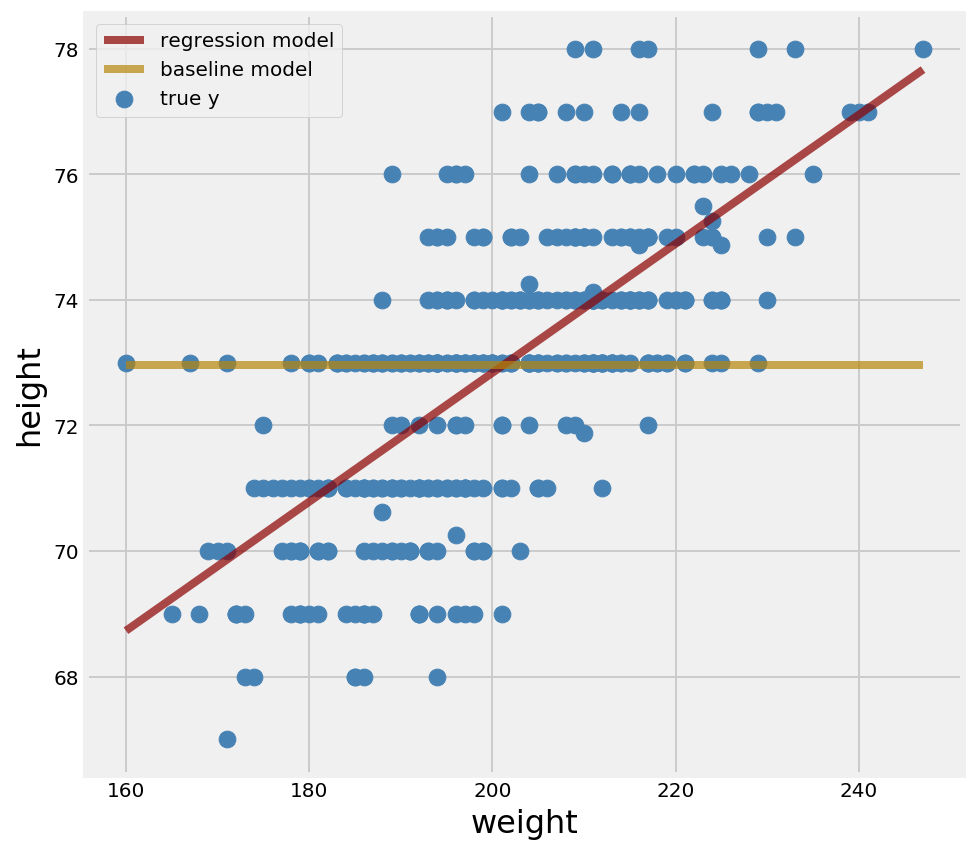

In [12]:
def plot_regression_wbaseline(x, y, yhat):
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    
    ymean = np.mean(y)
    
    ax.scatter(x, y, color='steelblue', s=70, label='true y')
    
    min_x, max_x = np.min(x), np.max(x)
    min_yhat = np.min(yhat)
    max_yhat = np.max(yhat)
    
    ax.plot([min_x, max_x], [min_yhat, max_yhat], color='darkred',
            linewidth=4, alpha=0.7, label='regression model')
    ax.plot([min_x, max_x], [ymean, ymean], color='darkgoldenrod',
            linewidth=4, alpha=0.7, label='baseline model')
    
    ax.set_xlabel('weight', fontsize=16)
    ax.set_ylabel('height', fontsize=16)
    
    plt.legend(loc='upper left')
    
    plt.show()
    
beta0 = mod.intercept_
beta1 = mod.coef_[0]
plot_regression_wbaseline(weight, height, wr_height_hat)

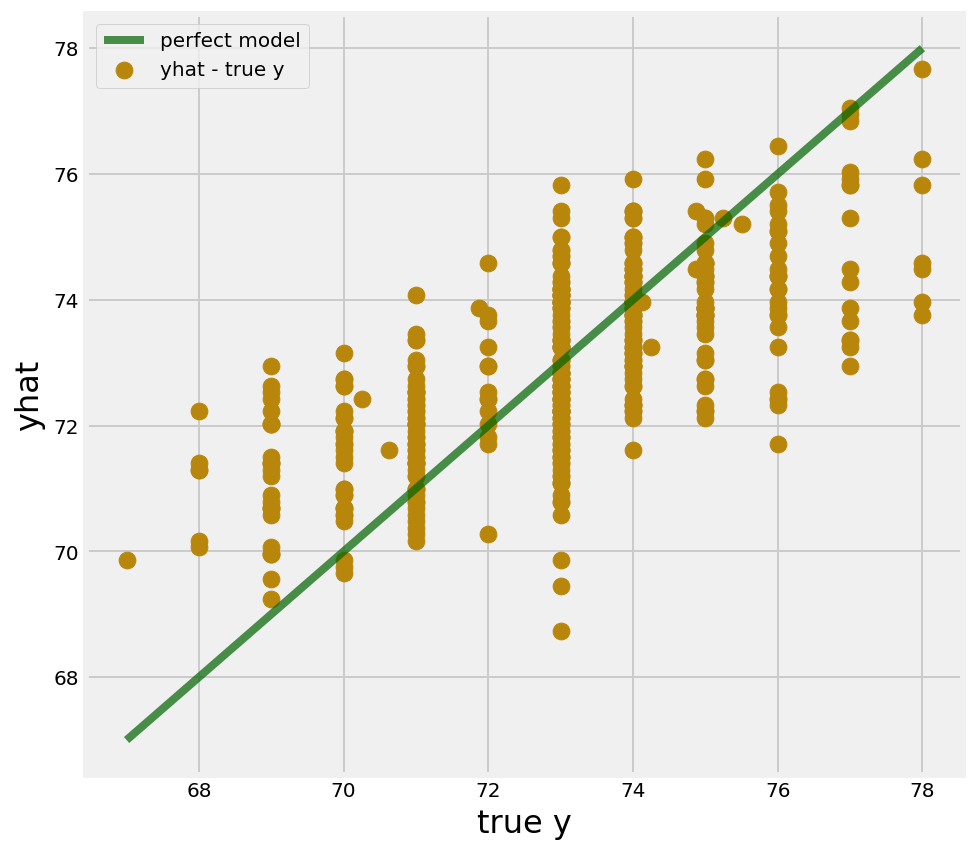

In [13]:
def plot_y_yhat(y, yhat):

    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()

    ax.scatter(y, yhat, color='darkgoldenrod', s=70, label='yhat - true y')

    max_val = np.max(y)
    min_val = np.min(y)

    ax.plot([min_val, max_val], [min_val, max_val], color='darkgreen',
            linewidth=4.0, alpha=0.7, label='perfect model')

    ax.set_xlabel('true y', fontsize=16)
    ax.set_ylabel('yhat', fontsize=16)

    plt.legend(loc='upper left')

    plt.show()
    
plot_y_yhat(height, wr_height_hat)

---

## $R^2$ of the regression

Recall that the $R^2$ metric calculates the variance explained by your model over the baseline model.


### 4. Calculate the $R^2$ either by hand or using sklearn or statsmodels

In [14]:
from sklearn.metrics import r2_score

wr_height_r2 = r2_score(height, wr_height_hat)
print('regression R^2:', wr_height_r2)

regression R^2: 0.48586405746473016


---

### 5. Remove outliers and build a non-outlier regression

Set a criteria for outliers that removes any value deviating more than 1.5 standard deviations from the mean (extremely strict) according to height.

Build a new regression with the non-outlier values.

In [15]:
remove_out = pd.DataFrame({'height':height, 'weight':weight.iloc[:,0]})
height_mean = height.mean()
height_std = height.std()
remove_out['height_outlier'] = (np.abs(remove_out.height - height_mean) > 1.5*height_std)
print(remove_out.height_outlier.sum())

56


In [16]:
weight_outliers = remove_out.weight[remove_out.height_outlier == True]
height_outliers = remove_out.height[remove_out.height_outlier == True]

height_no = remove_out.height[remove_out.height_outlier == False]
weight_no = remove_out.weight[remove_out.height_outlier == False]
print(weight_no.shape)
weight_no = weight_no.to_frame()
print(height_no.shape, weight_no.shape)

(367,)
(367,) (367, 1)


In [17]:
mod_no = LinearRegression()
mod_no.fit(weight_no, height_no)
beta0_no = mod_no.intercept_
beta1_no = mod_no.coef_[0]
print(beta0_no, beta1_no)

57.73390679889587 0.07608370553069707


In [18]:
height_no_hat = mod_no.predict(weight_no)

In [19]:
height_noall_hat = mod_no.predict(weight)

---

### 6. Plot the regression with the outliers and without the outliers

Use the full data for the scatter plot (including outliers).

Then add both regression lines (including and excluding outliers).

How do the regression lines change (if at all)? Why?

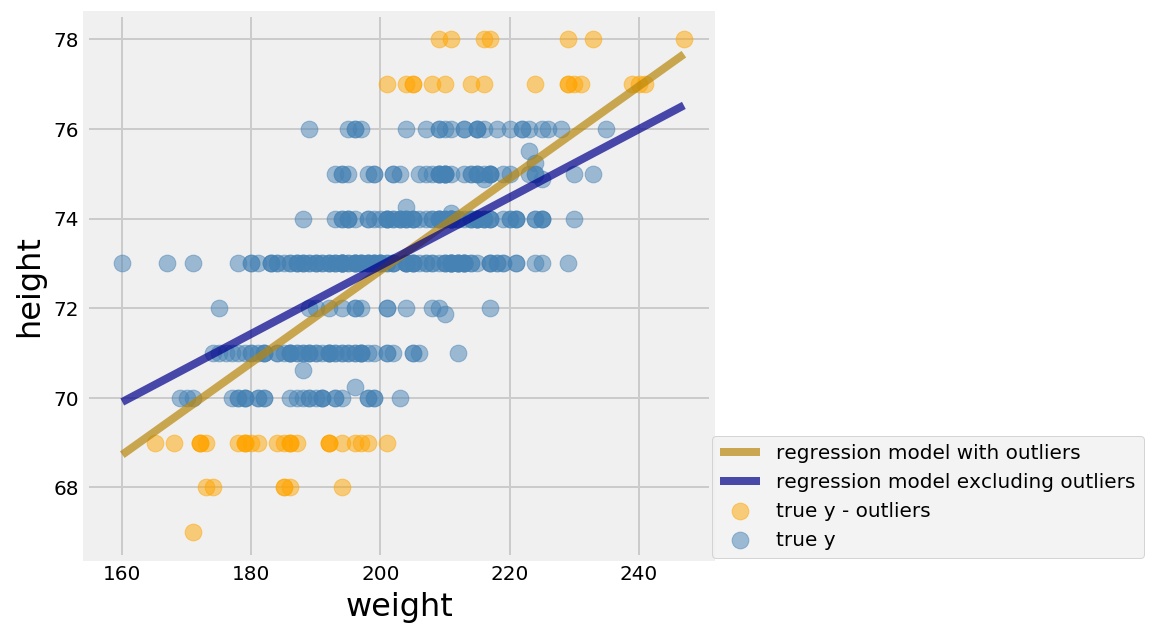

In [20]:
def plot_regressions(x, y, yhat1, yhat2):
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
        
    ax.scatter(weight_outliers, height_outliers, color='orange', s=70, label='true y - outliers', alpha=0.5)
    ax.scatter(weight_no, height_no, color='steelblue', s=70, label='true y', alpha=0.5)
   
    min_x, max_x = np.min(x), np.max(x)
    
    min_yhat1 = np.min(yhat1)
    max_yhat1 = np.max(yhat1)
    
    min_yhat2 = np.min(yhat2)
    max_yhat2 = np.max(yhat2)
    
    ax.plot([min_x, max_x], [min_yhat1, max_yhat1], color='darkgoldenrod',
            linewidth=4, alpha=0.7, label='regression model with outliers')
    ax.plot([min_x, max_x], [min_yhat2, max_yhat2], color='darkblue',
            linewidth=4, alpha=0.7, label='regression model excluding outliers')
    
    ax.set_xlabel('weight', fontsize=16)
    ax.set_ylabel('height', fontsize=16)
    
    plt.legend(loc=[1,0])
    
    plt.show()
    
wr_height_hat_no = mod_no.predict(weight)

plot_regressions(weight, height, wr_height_hat, wr_height_hat_no)

---

### 7. Calculate the $R^2$ of your outlier-removed model and compare it to the original model

Which performs better? Why do you think that is?


In [21]:
wr_height_no_r2 = r2_score(height_no, height_no_hat)
print('regression R^2:', wr_height_r2)
print('regression outliers removed R^2:', wr_height_no_r2)

regression R^2: 0.48586405746473016
regression outliers removed R^2: 0.3842613933300234


---

## Examining residuals

Looking at the residuals (errors) of your model is a good practice. Normally distributed residuals indicate that the assumptions of linear regression are probably being met, which in turn means that your regression is modeling the linear relationship appropriately.

### 8. Plot a histogram of the residuals from the original and no-outlier model

In [22]:
height_resid = height - wr_height_hat
height_no_resid = height - wr_height_hat_no

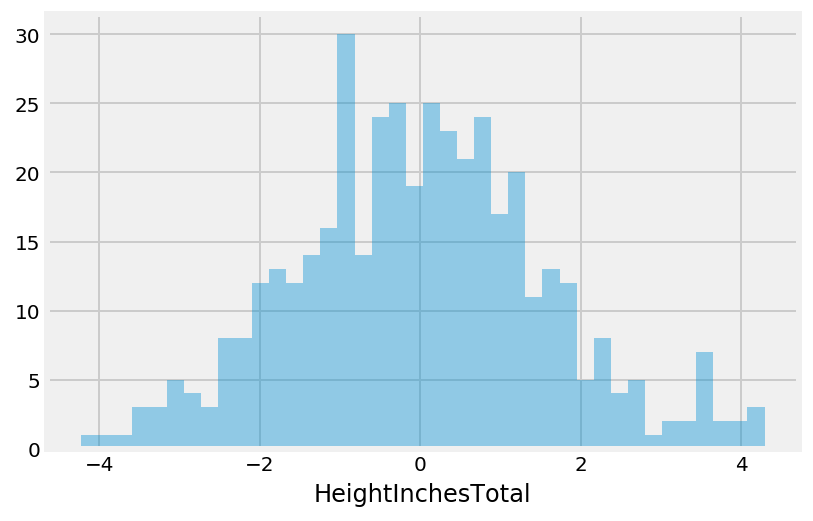

In [23]:
sns.distplot(height_resid, bins=40, hist=True, kde=False)
plt.show()

---

## Validating the model against a test set

Load in the test set file for the combine data. Pull out the corresponding target and predictor variables for the test set.

It is best practice after you build a model to, if possible, validate it against held out data. If it performs as well or nearly as well, you can be more sure that the model you've created is in fact making a correct inference about the linear relationship between variables for the overall population.

### 9. Get the $R^2$ value for your original model predicting values from the test data

Compare this to the $R^2$ on your training data.


*Hint: Don't forget to apply the same selection if you've filtered the training data*

In [24]:
combine_test = pd.read_csv('../../../../../resource-datasets/football_combine/combine_test.csv')

In [25]:
wrs_test = combine_test[combine_test.Position == 'WR']
weight_test = wrs_test[['Weight']]
height_test = wrs_test.HeightInchesTotal

height_test_yhat = mod.predict(weight_test) # This is using the model that was trained on all data (including outliers)

height_test_r2 = r2_score(height_test, height_test_yhat)

print('R^2 on train set:', wr_height_r2)
print('R^2 on test set:', height_test_r2)

R^2 on train set: 0.48586405746473016
R^2 on test set: 0.5128272600287602


### 10. Calculate the MSE for the test data and baseline model on test data

In [26]:
mod_test_mse = mean_squared_error(height_test, height_test_yhat)
base_test_mse = mean_squared_error(height_test, np.repeat(np.mean(height_test), len(height_test)))

print('Model on test mse:', mod_test_mse)
print('Baseline test mse:', base_test_mse)

Model on test mse: 3.0438650966969787
Baseline test mse: 6.248020151695419


### 11. Plot the regression applied to test data against the test data baseline model

Look visually how it performs versus just guessing the mean of the target in the test data.


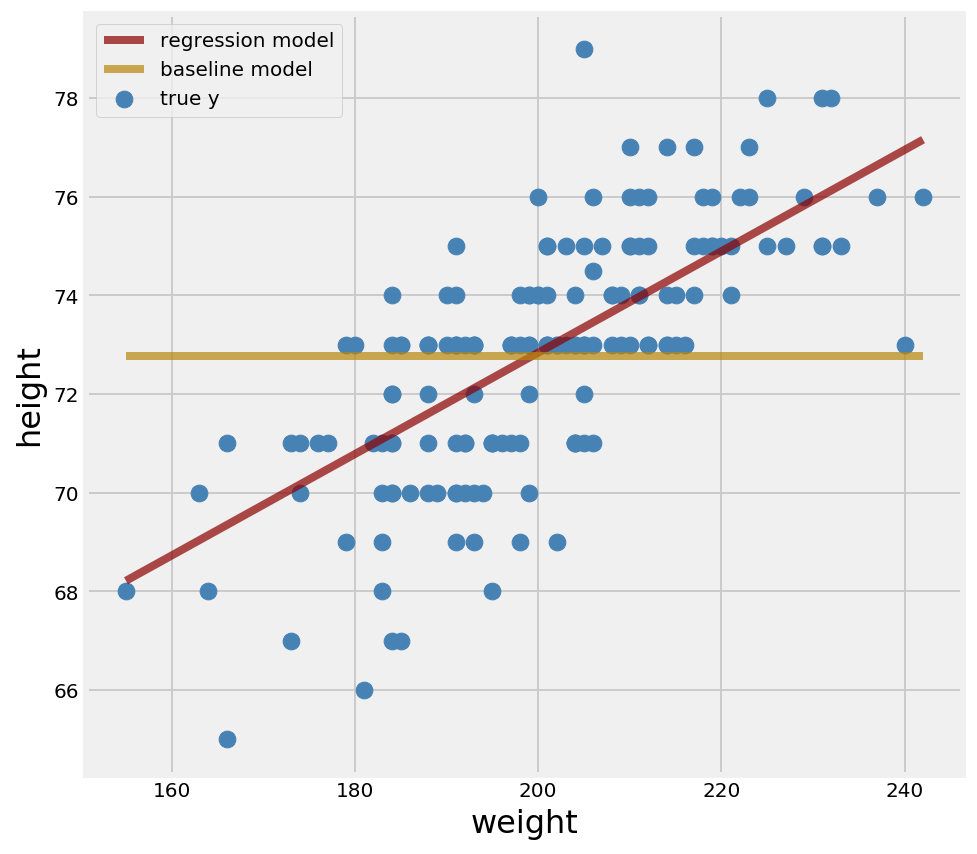

In [27]:
plot_regression_wbaseline(weight_test.iloc[:,0], height_test, height_test_yhat)